In [9]:
import json
notes_json = '''{
  "notes": [
    {
      "note": "C",
      "frequency": 261.63
    },
    {
      "note": "C#/Db",
      "frequency": 277.18
    },
    {
      "note": "D",
      "frequency": 293.66
    },
    {
      "note": "D#/Eb",
      "frequency": 311.13
    },
    {
      "note": "E",
      "frequency": 329.63
    },
    {
      "note": "F",
      "frequency": 349.23
    },
    {
      "note": "F#/Gb",
      "frequency": 369.99
    },
    {
      "note": "G",
      "frequency": 392.00
    },
    {
      "note": "G#/Ab",
      "frequency": 415.30
    },
    {
      "note": "A",
      "frequency": 440.00
    },
    {
      "note": "A#/Bb",
      "frequency": 466.16
    },
    {
      "note": "B",
      "frequency": 493.88
    }
  ]
}

'''

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


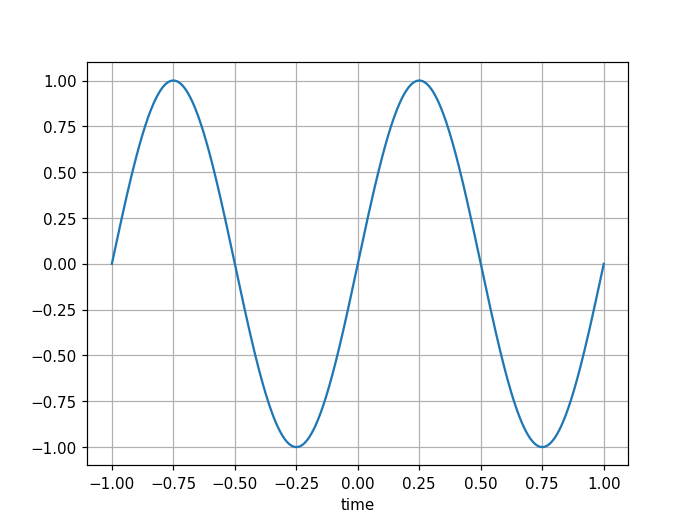

In [11]:
t  = np.linspace(-1,1,1000)
freq = 1
w0 = 2*np.pi* freq


x  = np.sin(w0 * t)

fig,ax = plt.subplots(1)
ax.plot(t,x)
plt.xlabel("time")
plt.grid()
plt.show()

In [12]:

def fourier_coef_pulse(k):
    global coef_history
    if k==0:k=1e-10
    duty_cycle = 0.5
    coef =  2/(np.pi * k) * np.sin(k * np.pi * duty_cycle)
    coef_history.append(coef)
    return coef

def fourier_coef_triangle(k):
    if not k%2:return 0
    return 4/(np.pi * k)**2
    
def fourier_coef_rectified_sine(k):
    if k==0:k=1e-10
    return -4/(4 * k**2 - 1) * np.pi


In [13]:
def get_freq_for_note(note_needed):
    notes = json.loads(notes_json)
    freq = -1
    for note in notes["notes"]:
        if note["note"] == note_needed:
            return np.float32(note["frequency"])
        
    

<IPython.core.display.Javascript object>


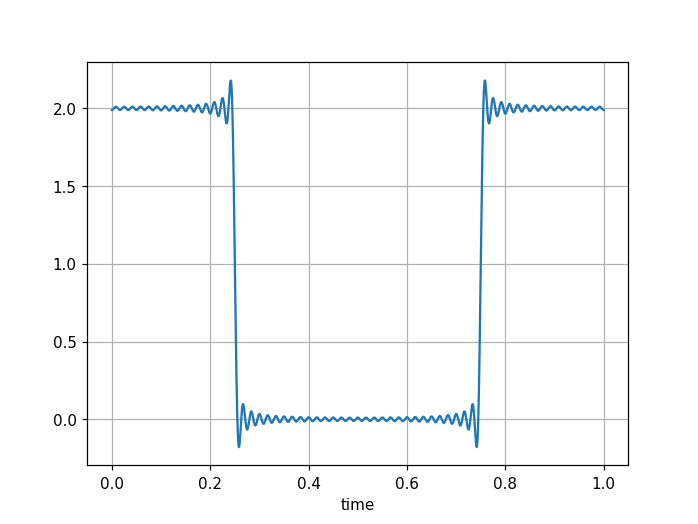

In [14]:
N = 60
x = 0
coef_history = []



t  = np.linspace(0,1,10_000)
freq = 1
w0 = 2*np.pi* freq

for i in range(-N,N+1):
    x += fourier_coef_pulse(i) * np.cos(i * w0 * t) 
    
fig,ax = plt.subplots(1)
ax.plot(t,x)
plt.xlabel("time")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


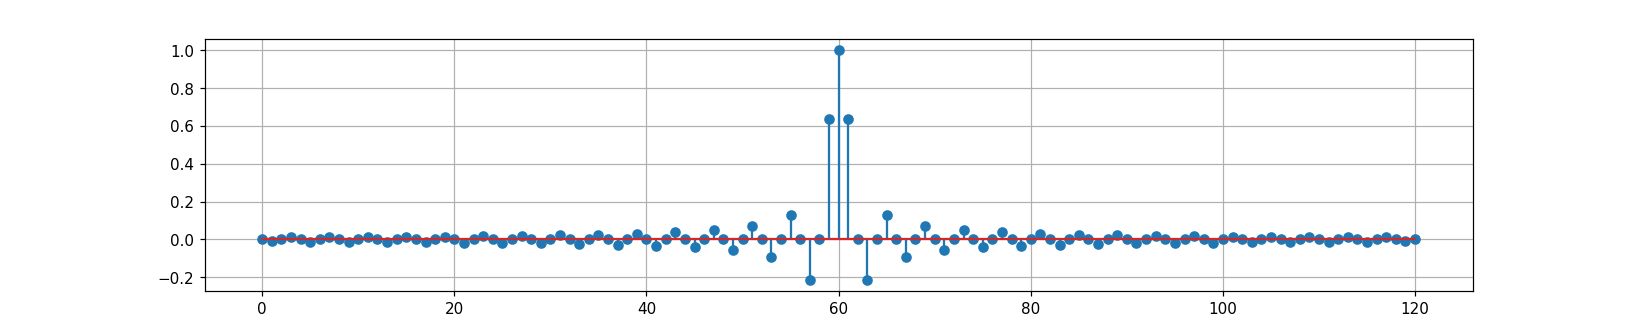

In [15]:
fig,ax = plt.subplots(1,figsize=(15,3))
ax.stem(coef_history)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


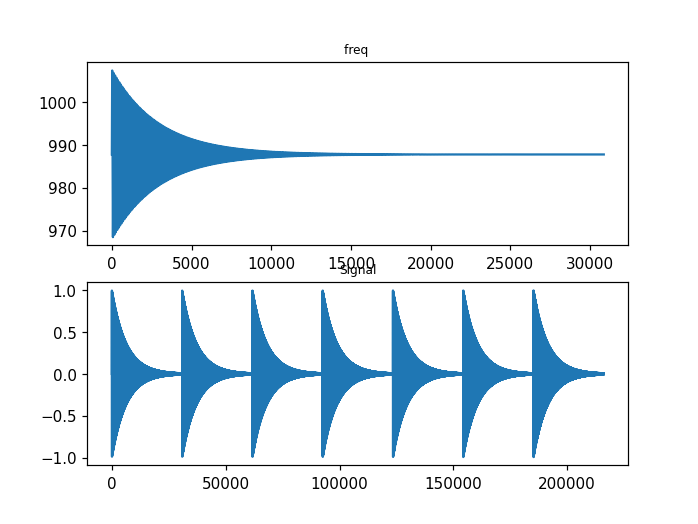

In [16]:
from IPython.display import Audio
signal = np.array([])

sample_rate = 44100
notes = ["C","D","E","F","G","A","B"]
duration = 0.7 # seconds

for note in notes:
    FREQ = get_freq_for_note(note) *2**1


    t = np.linspace(0,duration,int(duration*sample_rate)) 

    mod_freq = FREQ * 0.5 # Hz
    alpha = 0.02 * np.sin(2 * np.pi * mod_freq * t) * np.exp(-15 * t)
    freq = FREQ * ( 1 + alpha)  # Hz


    signal = np.concatenate((signal, np.sin(2 * np.pi * freq * t) * np.exp(-7 * t)),axis=0) 

fig,ax = plt.subplots(2)
ax[0].plot(freq)
ax[0].set_title("freq ",fontsize=8)


ax[1].plot(signal)
ax[1].set_title("Signal", fontsize=8)
plt.show()

Audio(data=signal, rate=sample_rate,autoplay=1)
